In [1]:
#Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [2]:
#Carga de datos

datos = pd.read_csv('C:\\Users\\USUARIO\\Desktop\\Anexo 2 - Dataset Vehicle\\Car details v3.csv')

In [3]:
# Análisis exploratorio de datos (EDA)
print(datos.head())  # Ver las primeras filas del DataFrame

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [4]:
print(datos.info())  # Información general sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [5]:
print(datos.describe())  # Estadísticas descriptivas

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


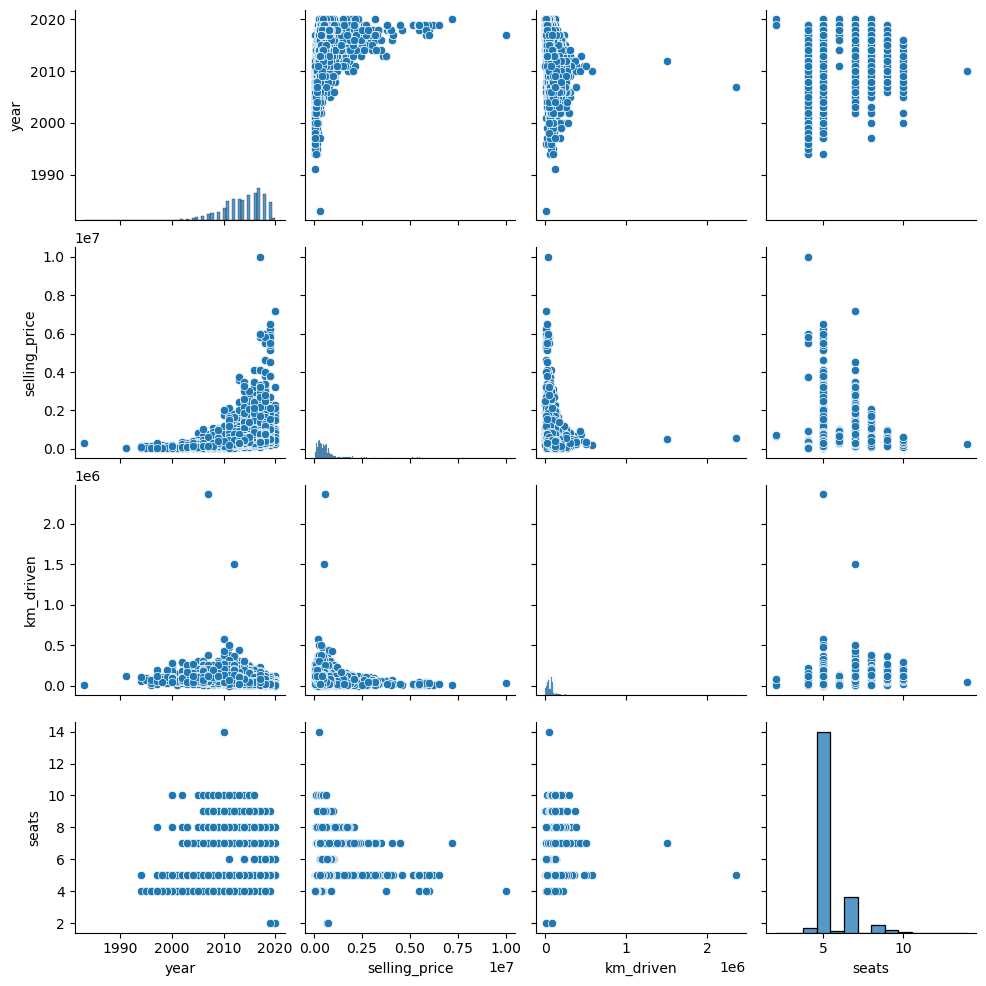

In [6]:
# Visualización: scatterplot entre características
sns.pairplot(datos)
plt.show()

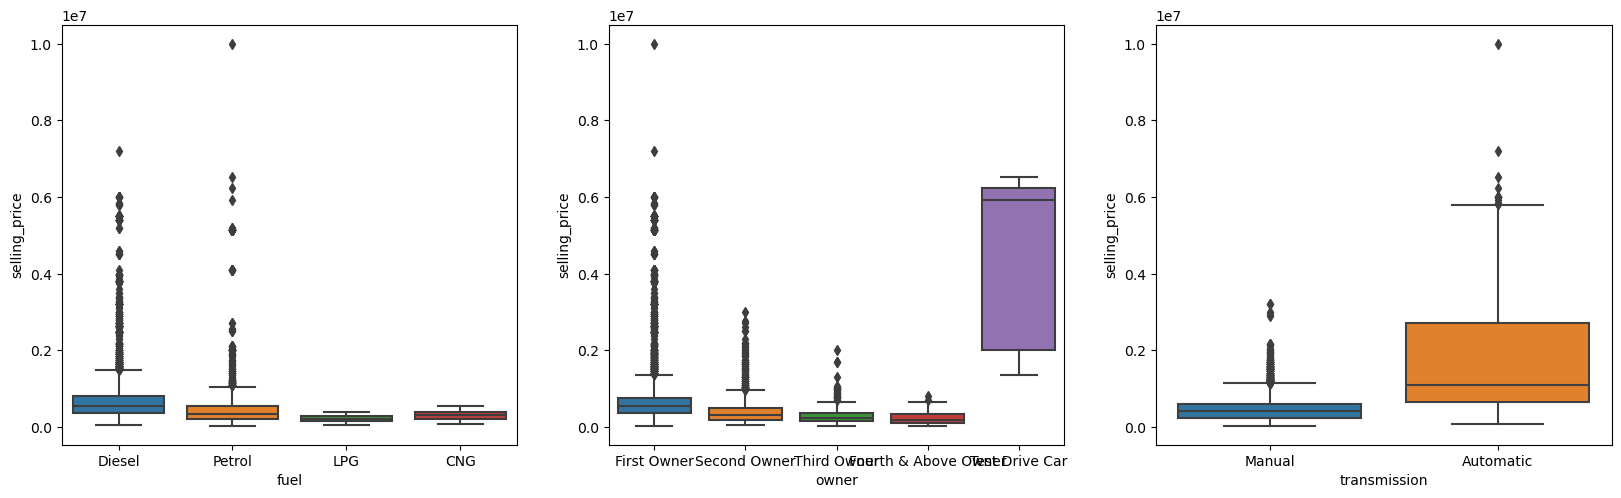

In [7]:
#diagrama de caja para variables categoricas
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fuel', y = 'selling_price', data = datos)
plt.subplot(2,3,2)
sns.boxplot(x = 'owner', y = 'selling_price', data = datos)
plt.subplot(2,3,3)
sns.boxplot(x = 'transmission', y = 'selling_price', data = datos)
plt.show()

In [8]:
#Preparacion de datos 

varlist =  ['transmission']

def binary_map(x):
    return x.map({'Manual': 1, 'Automatic': 0})

datos[varlist] = datos[varlist].apply(binary_map)

In [9]:
datos.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,1,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,1,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,1,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,1,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,1,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
from sklearn.model_selection import train_test_split

# Especificamos esto para que el conjunto de datos de entrenamiento y de prueba siempre tenga las mismas filas, respectivamente
np.random.seed(0)
df_train, df_test = train_test_split(datos, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
#Escalado mínimo-máximo, Estandarización (media-0, sigma-1), Esta vez usaremos la escala MinMax.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
num_vars = ['year', 'transmission', 'km_driven', 'selling_price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [14]:
df_train_numeric = df_train.select_dtypes(include=['int', 'float'])  # Filtra solo columnas numéricas

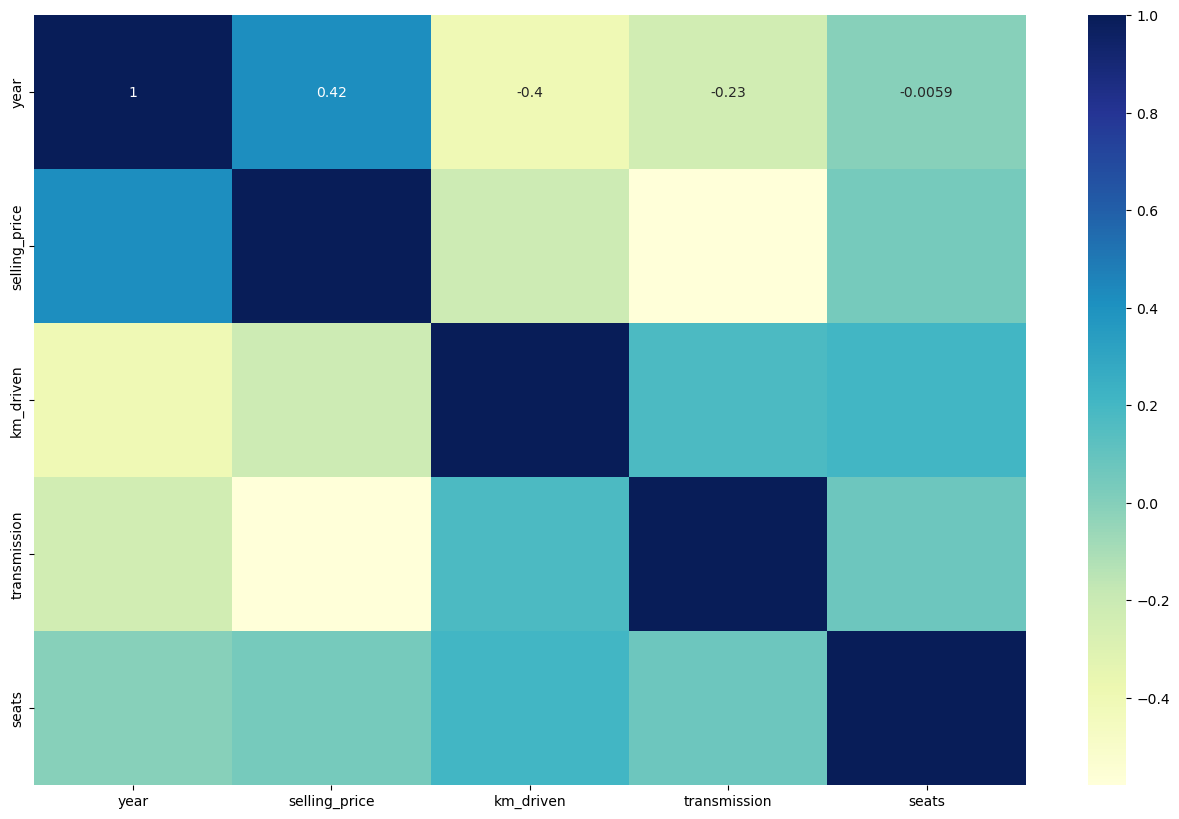

In [15]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_train_numeric.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [16]:
y_train = df_train_numeric.pop('selling_price')
X_train = df_train_numeric

In [17]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [18]:
imputer = SimpleImputer(strategy='mean')


In [19]:
# Aplicar el imputador a X_train para reemplazar NaN
X_train_imputed = imputer.fit_transform(X_train)

In [20]:
lm = LinearRegression()
lm.fit(X_train_imputed, y_train)

LinearRegression()

In [21]:
lm = LinearRegression(copy_X=True, fit_intercept=True)

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
# Crear un estimador (modelo) para usar con RFE
lm = LinearRegression()

In [23]:
# Crear un imputador para reemplazar NaN con la media en X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [24]:
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

In [25]:
# Inicializar RFE con el estimador (lm) y el número de características a seleccionar
rfe = RFE(estimator=lm, n_features_to_select=6)

In [26]:
# Aplicar RFE al DataFrame imputado y las etiquetas de entrenamiento
rfe.fit(X_train_imputed_df, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [27]:
selected_features = X_train_imputed_df.columns[rfe.support_]
feature_rankings = list(zip(X_train_imputed_df.columns, rfe.support_, rfe.ranking_))


In [28]:
print("Características seleccionadas:")
print(selected_features)

print("\nRankings de características:")
for feature_name, support, ranking in feature_rankings:
    print(f"{feature_name}: {'Selected' if support else 'Not Selected'} (Ranking: {ranking})")

Características seleccionadas:
Index(['year', 'km_driven', 'transmission', 'seats'], dtype='object')

Rankings de características:
year: Selected (Ranking: 1)
km_driven: Selected (Ranking: 1)
transmission: Selected (Ranking: 1)
seats: Selected (Ranking: 1)


In [29]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'km_driven', 'transmission', 'seats'], dtype='object')

In [30]:
# Creando el marco de datos X_test con la variable RFE seleccionada
X_train_rfe = X_train[col]

In [31]:
# Agregar una variable constante
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
X_train_rfe.replace([np.inf, -np.inf], np.nan, inplace=True)

In [33]:
# Eliminar filas con valores NaN en X_train_rfe y y_train
X_train_clean = X_train_rfe.dropna()
y_train_clean = y_train[X_train_rfe.index.isin(X_train_clean.index)]

In [34]:
# Ejecutar el modelo lineal después de la limpieza de datos
lm = sm.OLS(y_train_clean, X_train_clean).fit()

In [35]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     1014.
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:59:01   Log-Likelihood:                 7623.4
No. Observations:                5541   AIC:                        -1.524e+04
Df Residuals:                    5536   BIC:                        -1.520e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0168      0.007      2.335   

In [36]:
# Calcular los VIF para el modelo
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()
X = X_train_clean
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.95
2,km_driven,1.27
1,year,1.25
3,transmission,1.07
4,seats,1.06


In [38]:
#Análisis residual de los datos del tren.

y_train_selling_price = lm.predict(X_train_clean)

In [39]:
res = (y_train_selling_price - y_train)

In [40]:
# Librerias
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

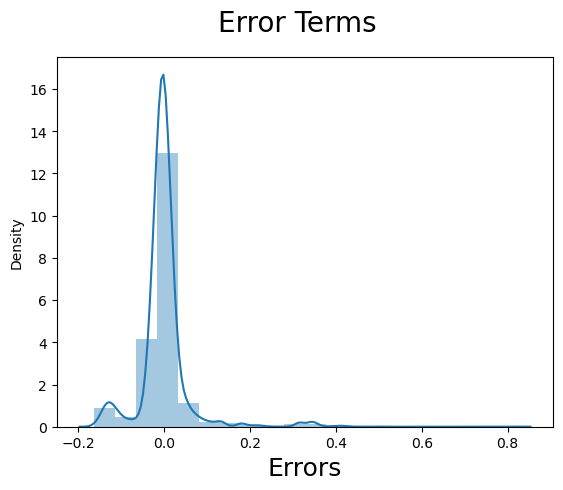

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_selling_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)    

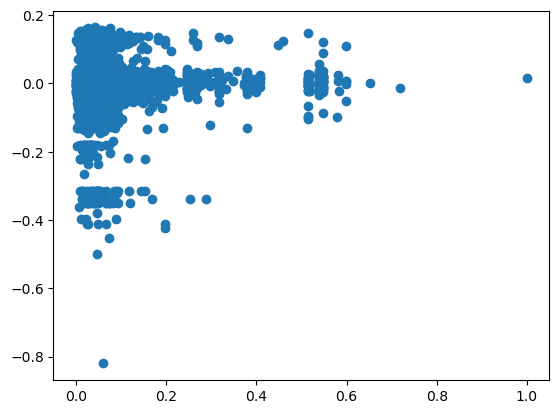

In [42]:
plt.scatter(y_train,res)
plt.show()

In [43]:
#No hay relacion en los terminos de error

In [44]:
#Aplicar la escalaen los conjuntos de prueba.
num_vars = ['year','km_driven', 'transmission', 'seats', 'selling_price']

In [46]:
y_test = df_test.pop('selling_price')
X_test = df_test

In [47]:
# Agregar variable constante al marco de datos de prueba
X_test = sm.add_constant(X_test)

In [48]:
#predicciones
X_test_clean = X_test[X_train_clean.columns]

In [49]:
# Making predictions
y_pred = lm.predict(X_test_clean)

In [51]:
from sklearn.metrics import r2_score

# Obtén índices de filas con NaN en y_pred
nan_indices = np.isnan(y_pred)

In [52]:
# Filtra X_test y y_test para eliminar filas correspondientes a NaN en y_pred
X_test_filtered = X_test[~nan_indices]
y_test_filtered = y_test[~nan_indices]

In [53]:
# Filtra y_pred para eliminar NaN
y_pred_filtered = y_pred[~nan_indices]

In [54]:
# Calcula R^2 score usando las versiones filtradas de y_test y y_pred
r2 = r2_score(y_test_filtered, y_pred_filtered)

In [57]:
from sklearn.metrics import r2_score 
r2_score(y_test_filtered, y_pred_filtered)

-0.6428717793311511

Text(0, 0.5, 'y_pred_filtered')

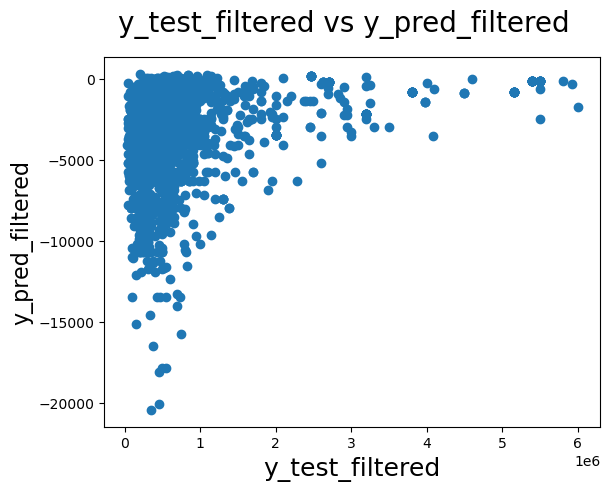

In [58]:
# Trazar y_test e y_pred para comprender la propagación
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test_filtered vs y_pred_filtered', fontsize=20)              # Plot heading 
plt.xlabel('y_test_filtered', fontsize=18)                          # X-label
plt.ylabel('y_pred_filtered', fontsize=16)                          # Y-label